# Longitudinal plots of human concat data

In [3]:
import pandas as pd
# import plotly.express as px
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.anova import AnovaRM
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrix, PatsyError
from statsmodels.regression.mixed_linear_model import MixedLM

df_FinalConcat = pd.read_csv("/Volumes/PARK2023-Q5758/SAA Systematic Review (Human Data)/Code_Output/FinalConcat.csv")
FinalConcat_PosSAA = df_FinalConcat[df_FinalConcat['QUALRep1'].notna() & (df_FinalConcat['QUALRep1'] == 'Positive')]


color_dict = {"Genetic": "#333333",
              "RBD +/- Hyposomia": "#ffd400",
              "Hyposmia":"#996600",
              "Sporadic":"#527506",
              "Healthy Control":"#000000"
              }


/var/folders/95/gx6gh43j57b1n5mbc197djbh0000gn/T/ipykernel_19323/3926893467.py:14: DtypeWarning: Columns (5,7,9,10,11,12,15,17,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,112,115,116,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,157,159,160,163,164,169,187,188,190,194,195,199,200,201,202,203,219,220,221,225,226,227,231,232,233,240,242,243,244,245) have mixed types. Specify dtype option on import or set low_memory=False.
  df_FinalConcat = pd.read_csv("/Volumes/PARK2023-Q5758/SAA Systematic Review (Human Data)/Code_Output/FinalConcat.csv")


## By Event

Error plotting mean_caudate: [Errno 2] No such file or directory: 'mean_caudate.svg'
Error plotting mean_putamen: [Errno 2] No such file or directory: 'mean_putamen.svg'
Error plotting Lymphocytes (%): [Errno 2] No such file or directory: 'Lymphocytes (%).svg'
Error plotting Monocytes: [Errno 2] No such file or directory: 'Monocytes.svg'
Error plotting Monocytes (%): [Errno 2] No such file or directory: 'Monocytes (%).svg'
Error plotting Neutrophils (%): [Errno 2] No such file or directory: 'Neutrophils (%).svg'
Error plotting FmaxRep_av: [Errno 2] No such file or directory: 'FmaxRep_av.svg'
Error plotting asyn: [Errno 2] No such file or directory: 'asyn.svg'
Error plotting CSFSAA: [Errno 2] No such file or directory: 'CSFSAA.svg'
Error plotting updrs_totscore_I-IV: [Errno 2] No such file or directory: 'updrs_totscore_I-IV.svg'
Error plotting NLR: [Errno 2] No such file or directory: 'NLR.svg'


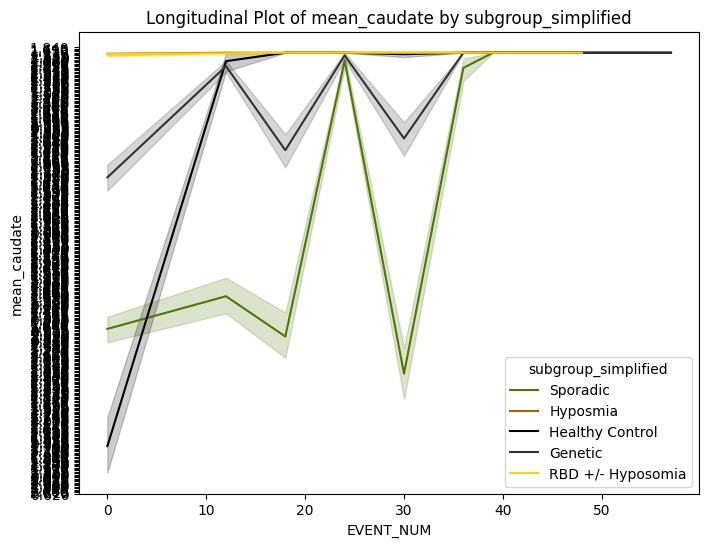

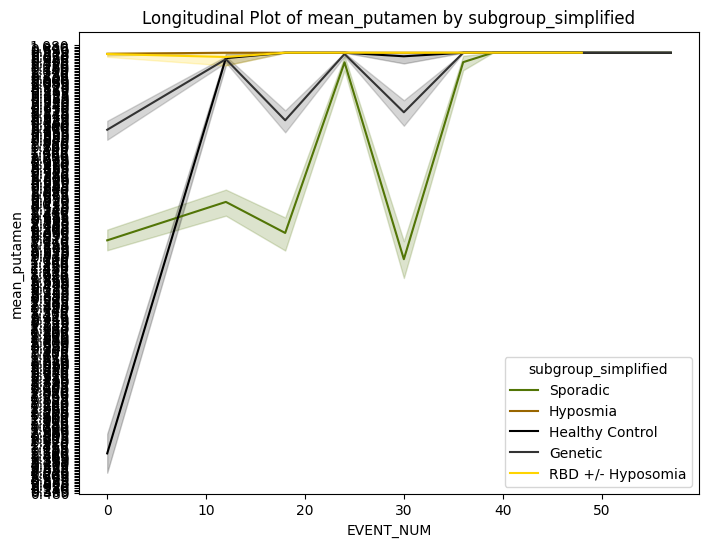

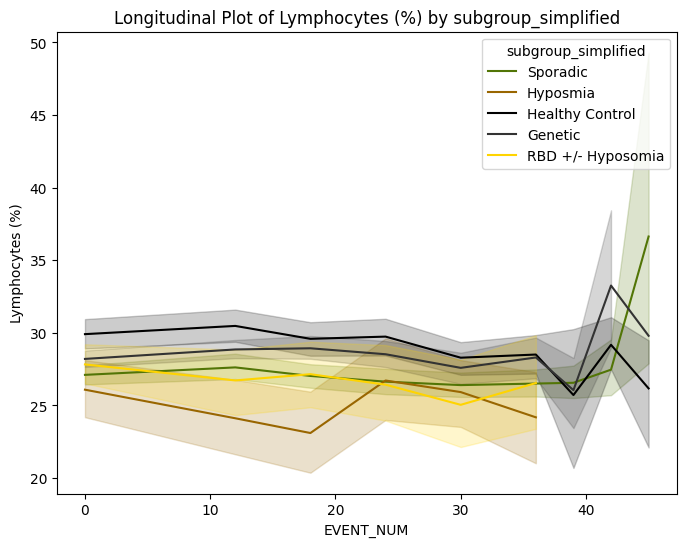

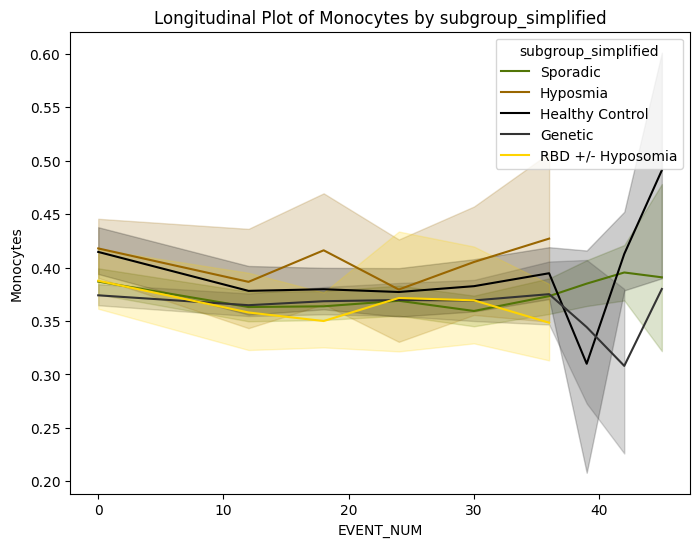

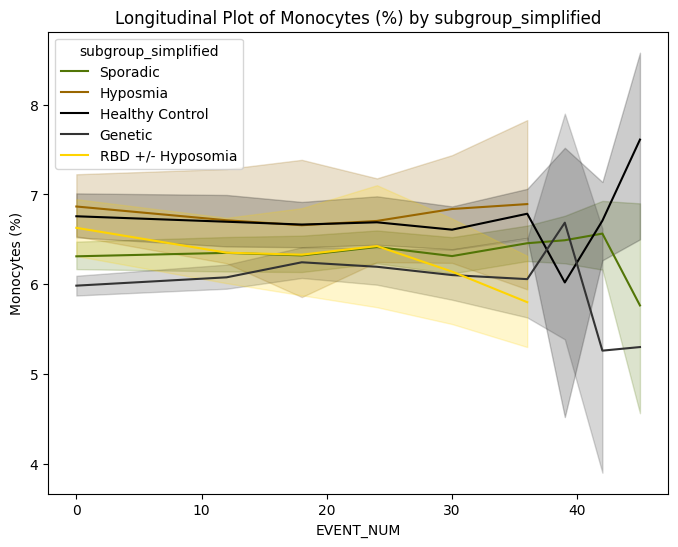

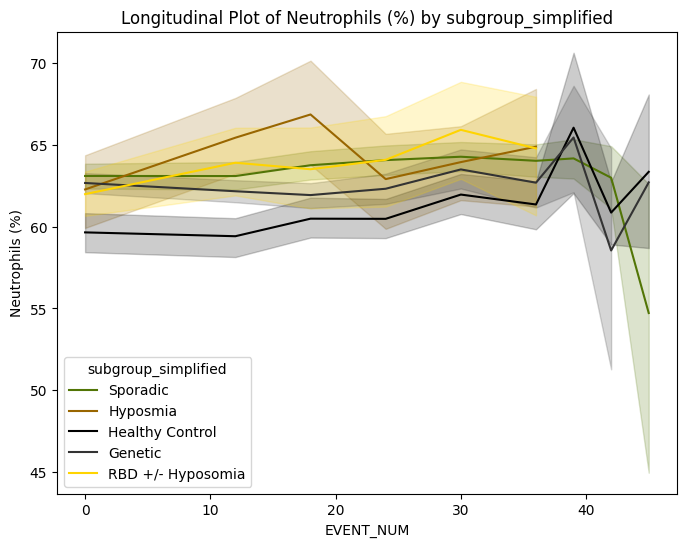

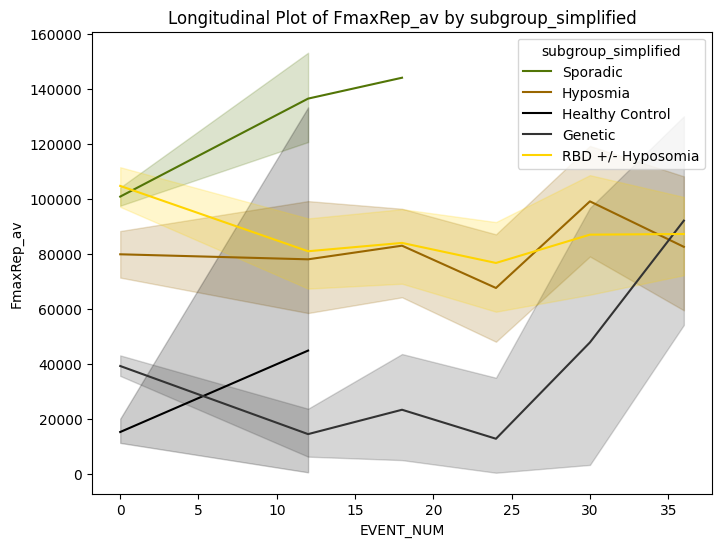

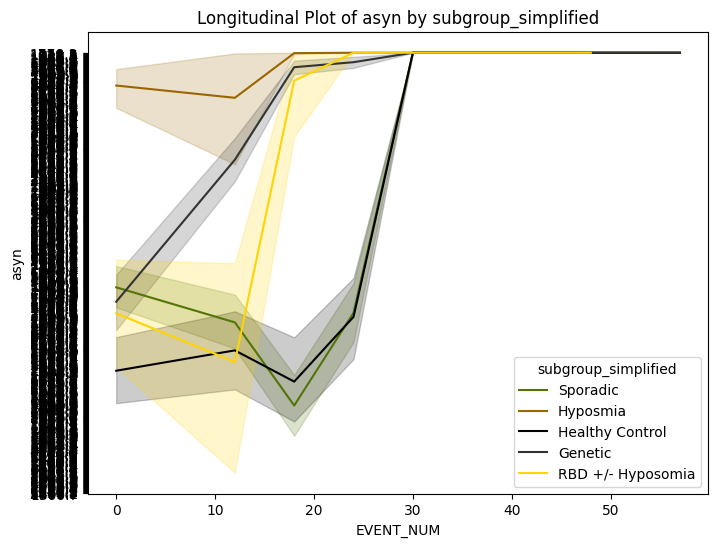

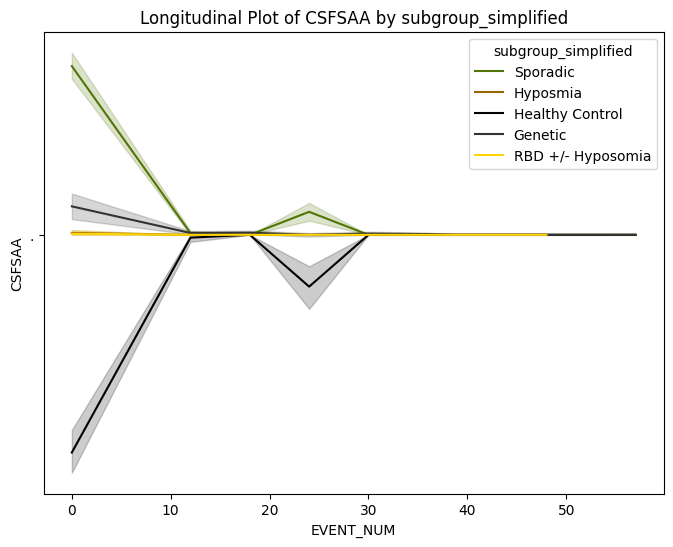

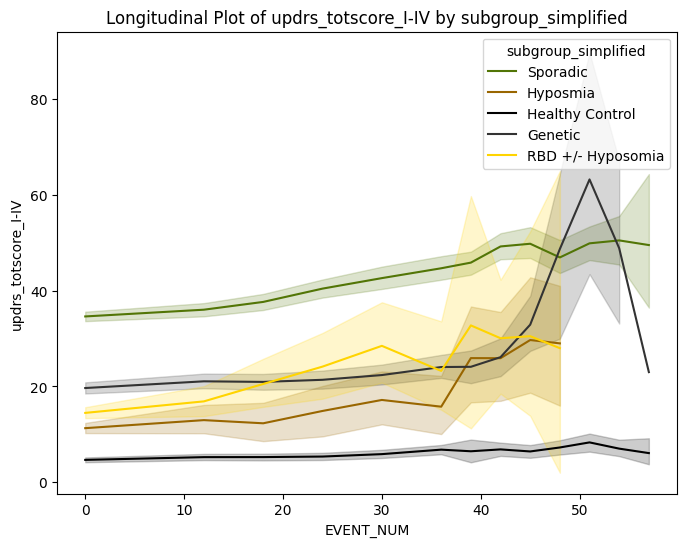

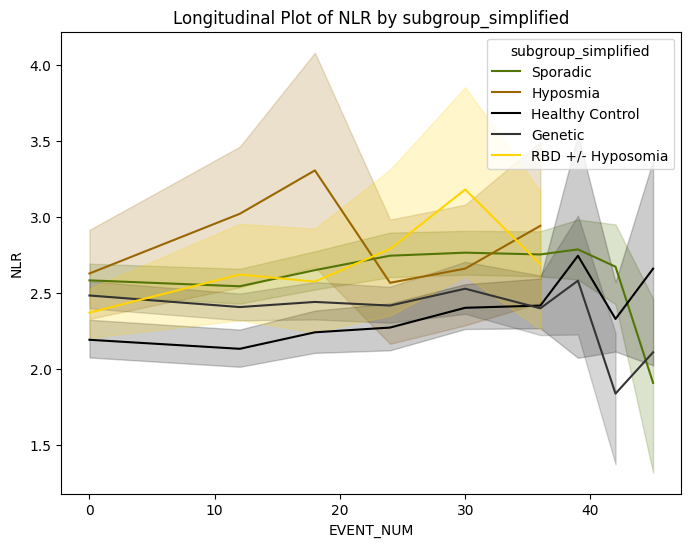

In [10]:
# List of specific columns you want to analyze
selected_columns = ['mean_caudate',
                    'mean_putamen',
                    'Lymphocytes (%)',
                    'Monocytes',
                    'Monocytes (%)',
                    'Neutrophils (%)',
                    'FmaxRep_av',
                    'asyn',
                    'CSFSAA',
                    'updrs_totscore_I-IV',
                    'NLR'
                    ]
#n.b. no FmaxRep or CSFSAA for Prodromal 

# Function for performing statistical test
def perform_stat_test(variable, timepoint, FinalConcat_PosSAA):
    subset = FinalConcat_PosSAA[(FinalConcat_PosSAA['EVENT_NUM'] == timepoint) & (FinalConcat_PosSAA[variable].notna())]

    groups = FinalConcat_PosSAA['subgroup_simplified'].unique()

    if len(groups) == 2:
        # T-test for two groups
        group1 = subset[subset['subgroup_simplified'] == groups[0]][variable]
        group2 = subset[subset['subgroup_simplified'] == groups[1]][variable]
        t_stat, p_value = stats.ttest_ind(group1, group2, nan_policy='omit')
        return p_value
    else:
        # ANOVA for more than two groups
        data = [subset[subset['subgroup_simplified'] == group][variable].dropna() for group in groups]
        f_stat, p_value = stats.f_oneway(*data)
        return p_value

for column in selected_columns:
    try:
        plt.figure(figsize=(8, 6))

        if FinalConcat_PosSAA[column].dtype == 'float64':
            FinalConcat_PosSAA[column] = FinalConcat_PosSAA[column].astype(float)

        sns.lineplot(x='EVENT_NUM', y=column, hue='subgroup_simplified', palette=color_dict, data=FinalConcat_PosSAA)
        plt.title(f'Longitudinal Plot of {column} by subgroup_simplified')

        # Add statistical annotations
        # for timepoint in FinalConcat_PosSAA['EVENT_ID'].unique():
        #     p_value = perform_stat_test(column, timepoint, FinalConcat_PosSAA)
            
        #     if p_value < 0.05:  # Threshold for significance
        #         plt.text(timepoint, plt.ylim()[1], f'*{p_value:.2f}', ha='center', fontsize=8)

        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        filename = f'{column}.svg'
        plt.savefig(filename, format='svg')
        plt.show()
            # Saving the plot as SVG with a unique filename

        plt.clf()
    except Exception as e:
        print(f"Error plotting {column}: {str(e)}")

### By Years since diagnosis ('years_since_diagnosis')

/Users/beckyparkinson/opt/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/beckyparkinson/opt/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


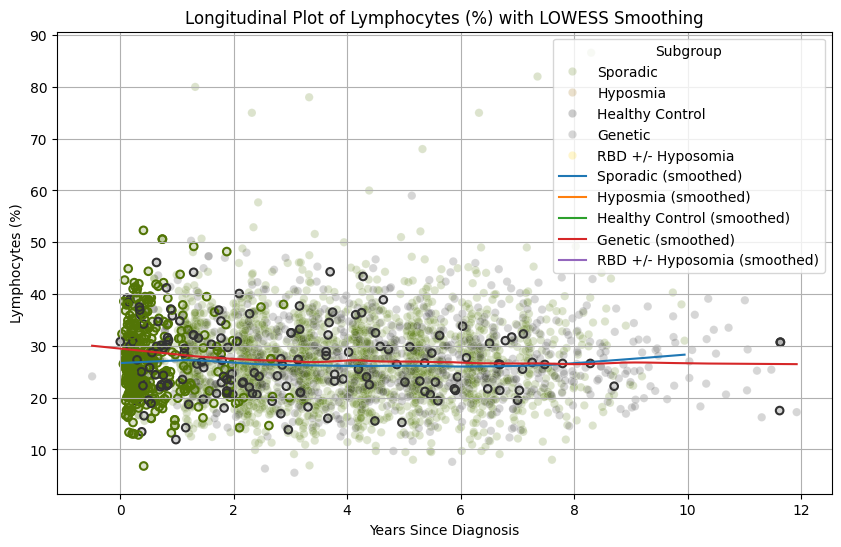

/Users/beckyparkinson/opt/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/beckyparkinson/opt/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


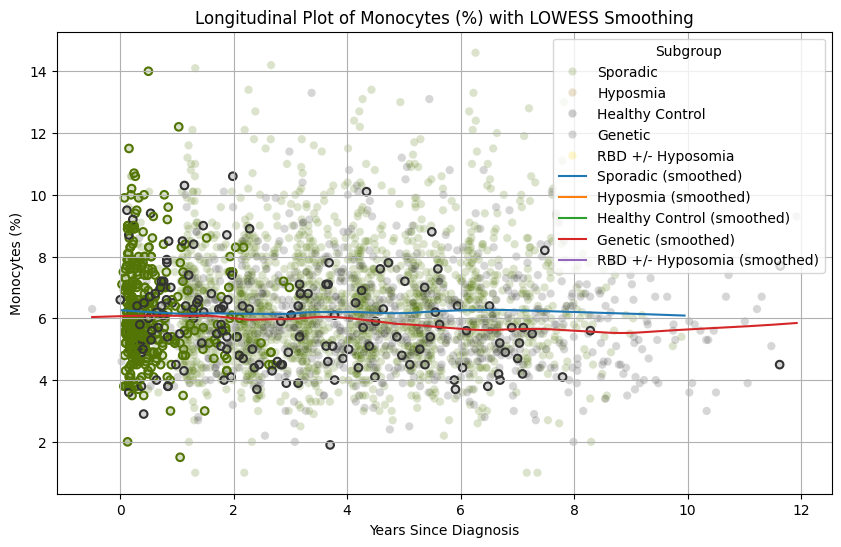

/Users/beckyparkinson/opt/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/beckyparkinson/opt/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


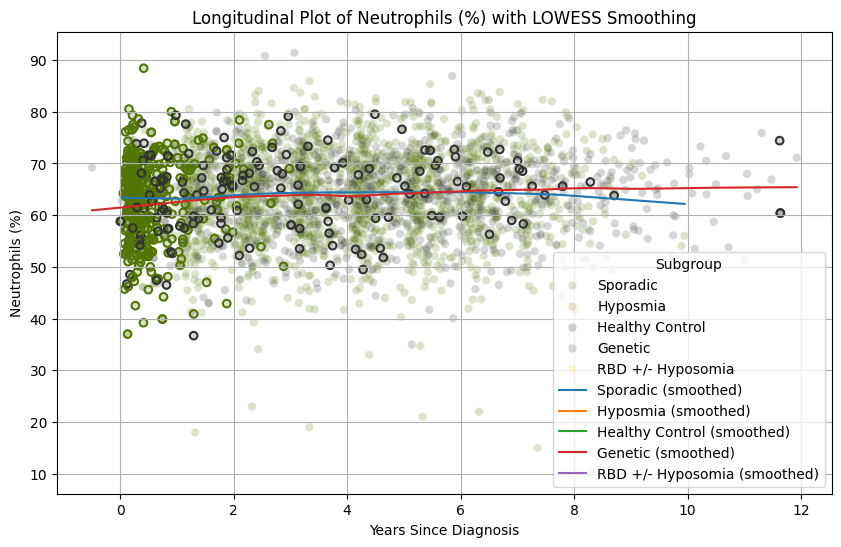

/Users/beckyparkinson/opt/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/beckyparkinson/opt/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


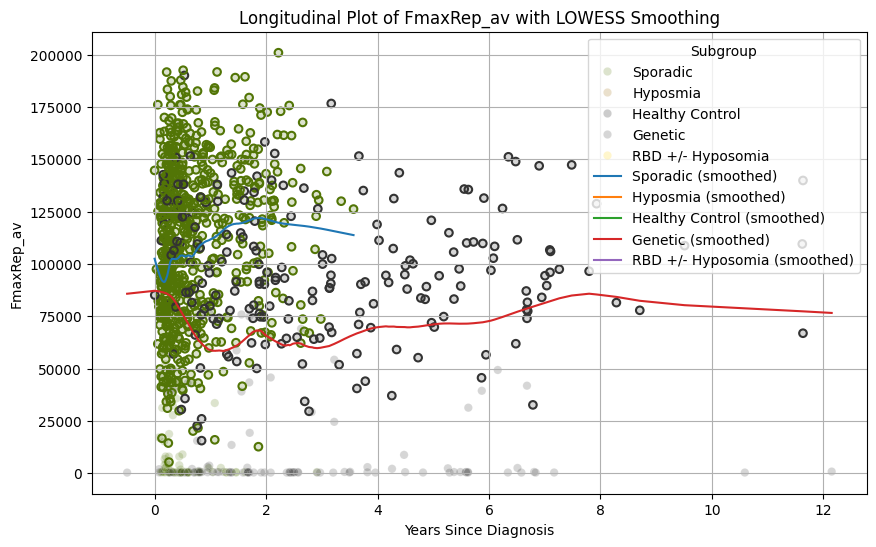

/Users/beckyparkinson/opt/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/beckyparkinson/opt/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


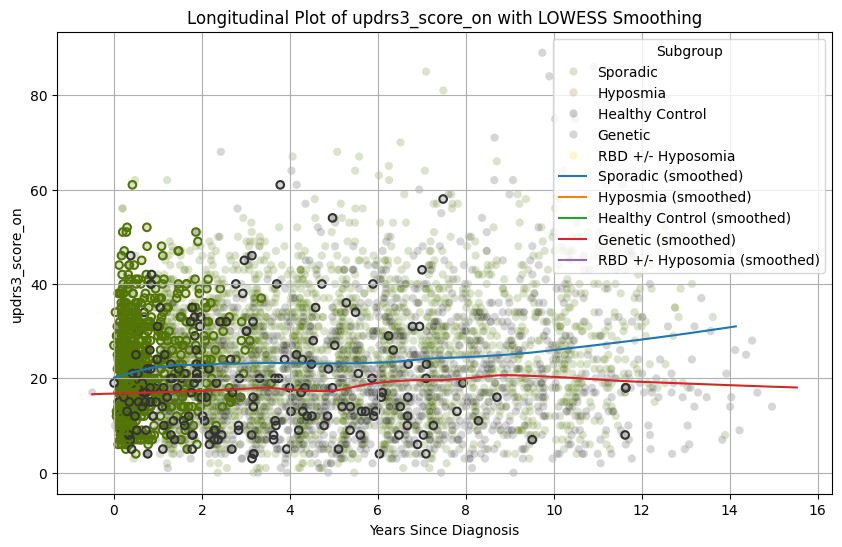

/Users/beckyparkinson/opt/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/beckyparkinson/opt/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


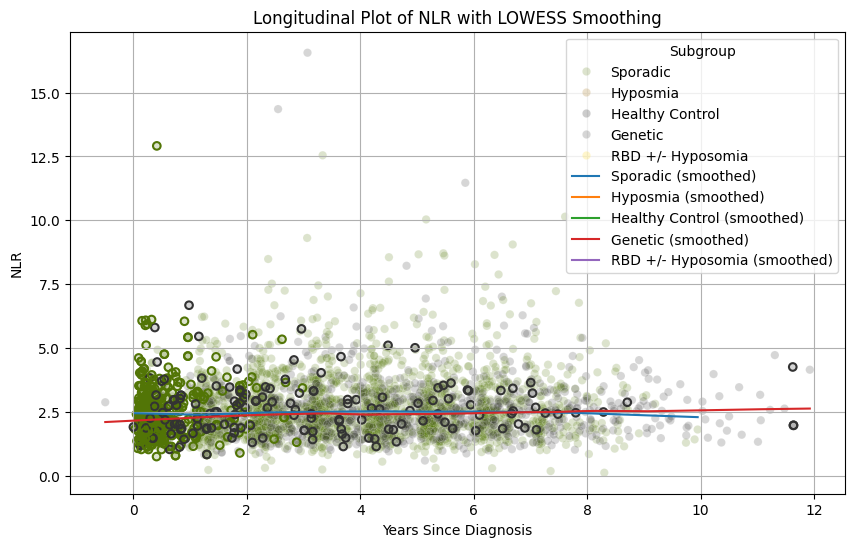

subgroup_simplified
Genetic     326
Sporadic    802
Name: PATNO, dtype: int64


In [11]:
########Quantify Time Since Diagnosis (v1)
FinalConcat_PosSAA['age_at_visit'] = pd.to_numeric(FinalConcat_PosSAA['age_at_visit'], errors='coerce').astype(float)
FinalConcat_PosSAA['agediag'] = pd.to_numeric(FinalConcat_PosSAA['agediag'], errors='coerce').astype(float)
FinalConcat_PosSAA['ageonset'] = pd.to_numeric(FinalConcat_PosSAA['ageonset'], errors='coerce').astype(float)

FinalConcat_PosSAA['years_since_diagnosis'] = FinalConcat_PosSAA['age_at_visit'] - FinalConcat_PosSAA['agediag']
# FinalConcat_PosSAA['years_since_onset'] = FinalConcat_PosSAA['age_at_visit'] - FinalConcat_PosSAA['ageonset']

# plot
selected_columns = ['Lymphocytes (%)',
                    'Monocytes (%)',
                    'Neutrophils (%)',
                    'FmaxRep_av',
                    'updrs3_score_on',
                    'NLR'
                    ]
for column in selected_columns:
    FinalConcat_PosSAA[column] = pd.to_numeric(FinalConcat_PosSAA[column], errors='coerce')
def plot_longitudinal_data_with_smoothing(df, columns):
    for column in columns:
        plt.figure(figsize=(10, 6))
        # Plot the original data
        sns.scatterplot(data=df, x='years_since_diagnosis', y=column, hue='subgroup_simplified', marker='o', alpha=0.2, palette=color_dict)

        # Apply LOWESS smoothing for each subgroup
        for subgroup in df['subgroup_simplified'].unique():
            subset = df[df['subgroup_simplified'] == subgroup]
            if not subset.empty:
                x = subset['years_since_diagnosis']
                y = subset[column]
                # Apply LOWESS
                smoothed = sm.nonparametric.lowess(y, x, frac=0.3)  # Adjust frac as needed 
                # Extract the smoothed values
                x_smoothed = smoothed[:, 0]
                y_smoothed = smoothed[:, 1]
                # Plot the smoothed values
                plt.plot(x_smoothed, y_smoothed, label=f'{subgroup} (smoothed)')
        #outline points based on the SAA
        for index, row in df.iterrows():
                 if pd.notna(row['subgroup_simplified']) and (row['QUALRep1'] == 'Positive' or row['QUALRep2'] == 'Positive' or row['QUALRep3'] == 'Positive'):
                    plt.scatter(row['years_since_diagnosis'], row[column], facecolors='none', 
                                edgecolors=color_dict[row['subgroup_simplified']],linewidths=1.5, s=30)
        plt.title(f'Longitudinal Plot of {column} with LOWESS Smoothing')
        plt.xlabel('Years Since Diagnosis')
        plt.ylabel(column)
        plt.legend(title='Subgroup')
        plt.grid(True)
        plt.show()

# Plot the data with smoothing
plot_longitudinal_data_with_smoothing(FinalConcat_PosSAA, selected_columns)

#Confirm number of participants in dataset
filtered_df = FinalConcat_PosSAA[FinalConcat_PosSAA['years_since_diagnosis'].notna()]
unique_patno_counts = filtered_df.groupby('subgroup_simplified')['PATNO'].nunique()
print(unique_patno_counts)


### By PRIMDIAG (years_since_PRIMDIAG)

/Users/beckyparkinson/opt/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/beckyparkinson/opt/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


FileNotFoundError: [Errno 2] No such file or directory: 'Lymphocytes (%).svg'

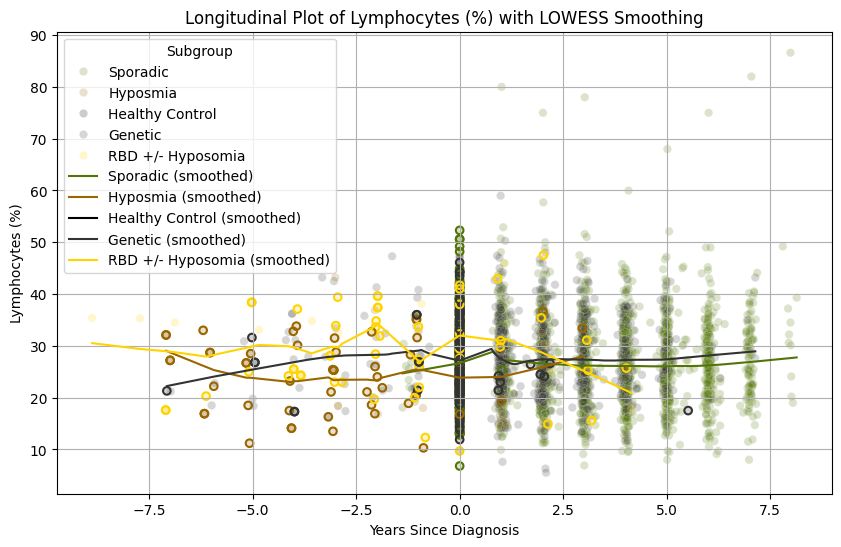

In [12]:
# Quantify Time Since Diagnosis by PRIMDIAG ONLY

# For prodromal patients, calculate the diagnosis point based on first 'PRIMDIAG' of 01
def calculate_years_since_PRIMDIAG(row, primdiag_dates):
    # Ensure that the subgroup is one of the ones we want to process
    if row['subgroup_simplified'] in ['Genetic', 'Sporadic', 'Hyposmia', 'RBD +/- Hyposomia']:
        diagnosis_age = primdiag_dates.get(row['PATNO'], None)
        if diagnosis_age:
            return row['age_at_visit'] - diagnosis_age
    return None

# Find the first occurrence of 'PRIMDIAG' == 01 for each patient
prodromal_patients = FinalConcat_PosSAA[FinalConcat_PosSAA['PRIMDIAG'] == 1]
primdiag_dates = prodromal_patients.groupby('PATNO')['age_at_visit'].min().to_dict()

# Apply the function to calculate years since diagnosis for prodromal patients
FinalConcat_PosSAA['years_since_PRIMDIAG'] = FinalConcat_PosSAA.apply(
    lambda row: calculate_years_since_PRIMDIAG(row, primdiag_dates),
    axis=1
)
FinalConcat_PosSAA['years_since_PRIMDIAG'] = pd.to_numeric(FinalConcat_PosSAA['years_since_PRIMDIAG'], errors='coerce')

# Plot
selected_columns = ['Lymphocytes (%)', 'Monocytes (%)', 'Neutrophils (%)', 'FmaxRep_av', 'updrs3_score_on', 'NLR']
for column in selected_columns:
    FinalConcat_PosSAA[column] = pd.to_numeric(FinalConcat_PosSAA[column], errors='coerce')

def plot_longitudinal_data_with_smoothing(df, columns):
    for column in columns:
        plt.figure(figsize=(10, 6))
        # Plot the original data
        sns.scatterplot(data=df, x='years_since_PRIMDIAG', y=column, hue='subgroup_simplified', marker='o', alpha=0.2, palette=color_dict)

        # Apply LOWESS smoothing for each subgroup
        for subgroup in df['subgroup_simplified'].unique():
            subset = df[df['subgroup_simplified'] == subgroup]
            if not subset.empty:
                x = subset['years_since_PRIMDIAG']
                y = subset[column]
                # Apply LOWESS
                smoothed = sm.nonparametric.lowess(y, x, frac=0.3)  # Adjust frac as needed 
                # Extract the smoothed values
                x_smoothed = smoothed[:, 0]
                y_smoothed = smoothed[:, 1]
                # Plot the smoothed values
                plt.plot(x_smoothed, y_smoothed, label=f'{subgroup} (smoothed)', color=color_dict.get(subgroup, 'black'))

        # Outline points based on the SAA
        for index, row in df.iterrows():
            if pd.notna(row['subgroup_simplified']) and (row['QUALRep1'] == 'Positive' or row['QUALRep2'] == 'Positive' or row['QUALRep3'] == 'Positive'):
                plt.scatter(row['years_since_PRIMDIAG'], row[column], facecolors='none', 
                            edgecolors=color_dict.get(row['subgroup_simplified'], 'black'), linewidths=1.5, s=30)

        plt.title(f'Longitudinal Plot of {column} with LOWESS Smoothing')
        plt.xlabel('Years Since Diagnosis')
        plt.ylabel(column)
        plt.legend(title='Subgroup')
        plt.grid(True)
        filename = f'{column}.svg'
        plt.savefig(filename, format='svg')
        plt.show()

# Plot the data with smoothing
plot_longitudinal_data_with_smoothing(FinalConcat_PosSAA, selected_columns)

# Confirm number of participants in dataset
filtered_df = FinalConcat_PosSAA[FinalConcat_PosSAA['years_since_PRIMDIAG'].notna()]
unique_patno_counts = filtered_df.groupby('subgroup_simplified')['PATNO'].nunique()
print(unique_patno_counts)




### By PRIMDIAG AND Years since diagnosis (years_since_diagnosis1)

#### Stats

In [5]:

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

FinalConcat_PosSAA['QUALRep1'] = FinalConcat_PosSAA['QUALRep1'].astype('category')
FinalConcat_PosSAA['subgroup_simplified'] = FinalConcat_PosSAA['subgroup_simplified'].astype('category')
##Stats for PRIMDIAG and years since diagnosis 
formula = "NLR ~ QUALRep1 * years_since_diagnosis1"
model = mixedlm(formula, FinalConcat_PosSAA, groups=FinalConcat_PosSAA["subgroup_simplified"])
result = model.fit()
print(result.summary())



# model = MixedLM("NLR ~ QUALRep1 * years_since_diagnosis1 * subgroup_simplified", FinalConcat_PosSAA, groups=FinalConcat_PosSAA["PATNO"], re_formula="~years_since_diagnosis1")
# result = model.fit()
# print(result.summary())

/var/folders/95/gx6gh43j57b1n5mbc197djbh0000gn/T/ipykernel_19323/1751164162.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FinalConcat_PosSAA['QUALRep1'] = FinalConcat_PosSAA['QUALRep1'].astype('category')
/var/folders/95/gx6gh43j57b1n5mbc197djbh0000gn/T/ipykernel_19323/1751164162.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FinalConcat_PosSAA['subgroup_simplified'] = FinalConcat_PosSAA['subgroup_simplified'].astype('category')


TypeError: '<' not supported between instances of 'str' and 'float'

/var/folders/95/gx6gh43j57b1n5mbc197djbh0000gn/T/ipykernel_19323/3014064352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FinalConcat_PosSAA['age_at_visit'] = pd.to_numeric(FinalConcat_PosSAA['age_at_visit'], errors='coerce').astype(float)
/var/folders/95/gx6gh43j57b1n5mbc197djbh0000gn/T/ipykernel_19323/3014064352.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FinalConcat_PosSAA['agediag'] = pd.to_numeric(FinalConcat_PosSAA['agediag'], errors='coerce').astype(float)
/var/folders/95/gx6gh43j57b1n5

FinalConcat_Rows:  1650 FinalConcat_Columns:  252


/var/folders/95/gx6gh43j57b1n5mbc197djbh0000gn/T/ipykernel_19323/3014064352.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FinalConcat_PosSAA[column] = pd.to_numeric(FinalConcat_PosSAA[column], errors='coerce')
/Users/beckyparkinson/opt/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/beckyparkinson/opt/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckyparkinson/opt/miniconda3/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in div

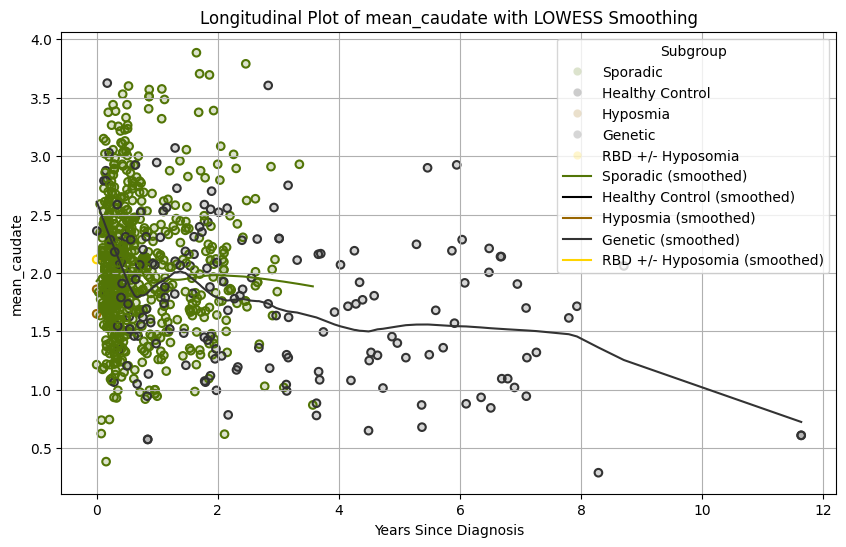

/Users/beckyparkinson/opt/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/beckyparkinson/opt/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckyparkinson/opt/miniconda3/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


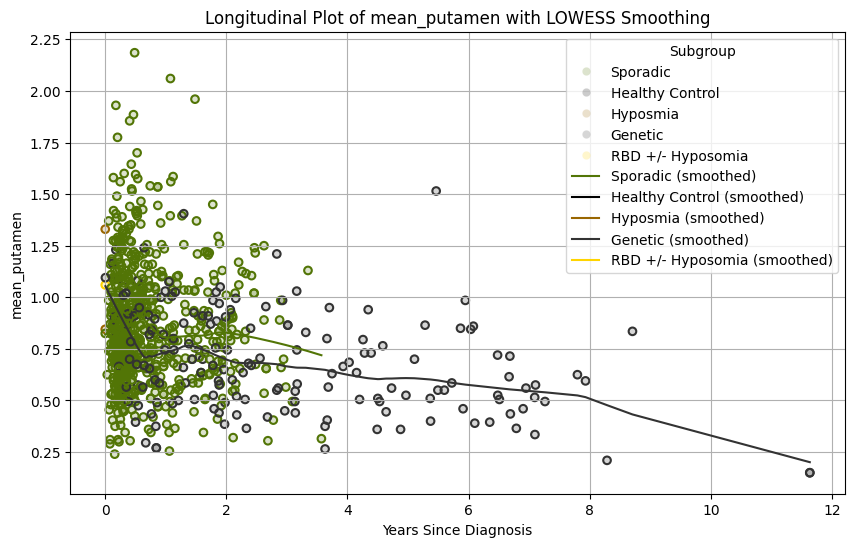

/Users/beckyparkinson/opt/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/beckyparkinson/opt/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


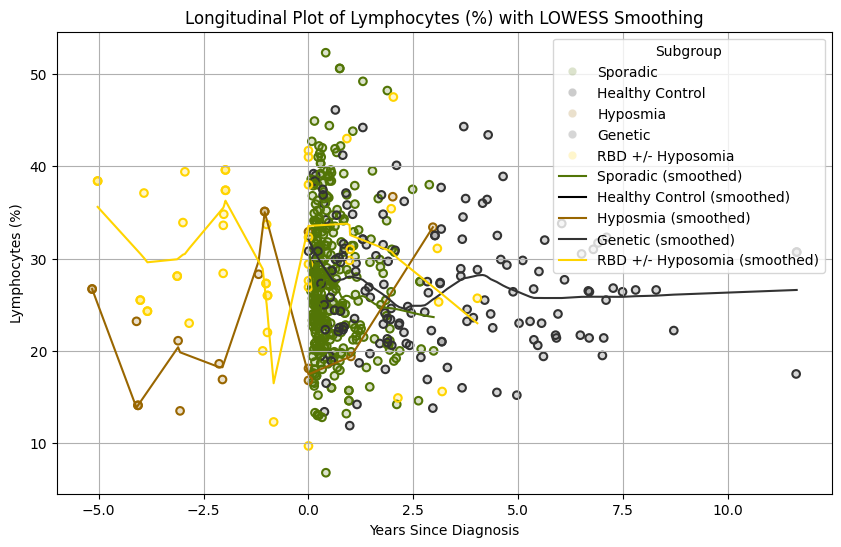

/Users/beckyparkinson/opt/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/beckyparkinson/opt/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


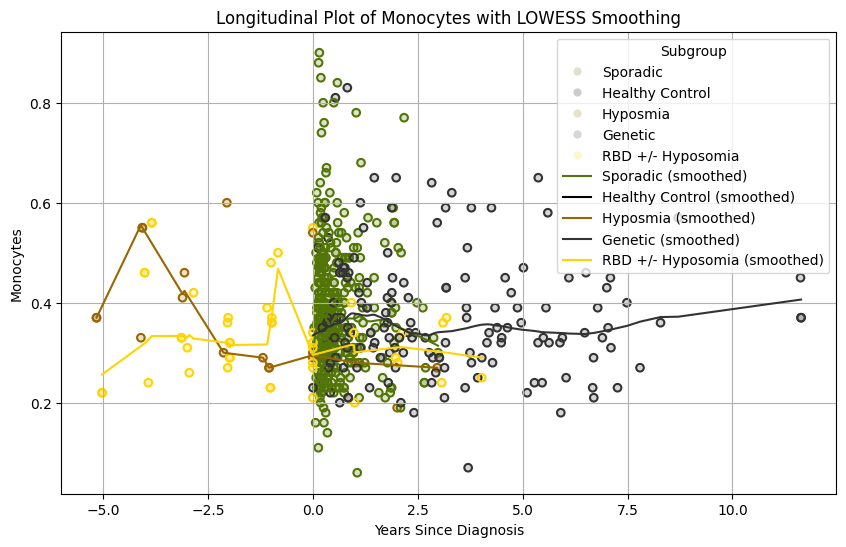

/Users/beckyparkinson/opt/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/beckyparkinson/opt/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


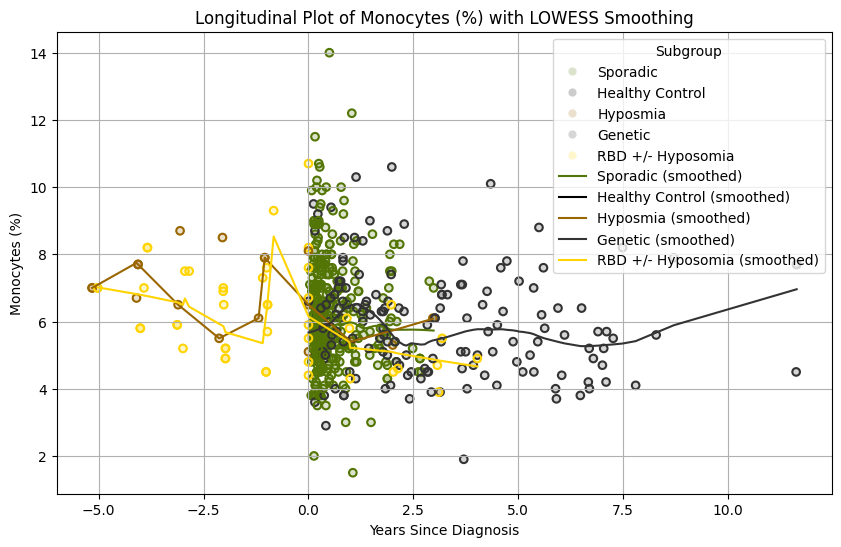

/Users/beckyparkinson/opt/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/beckyparkinson/opt/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


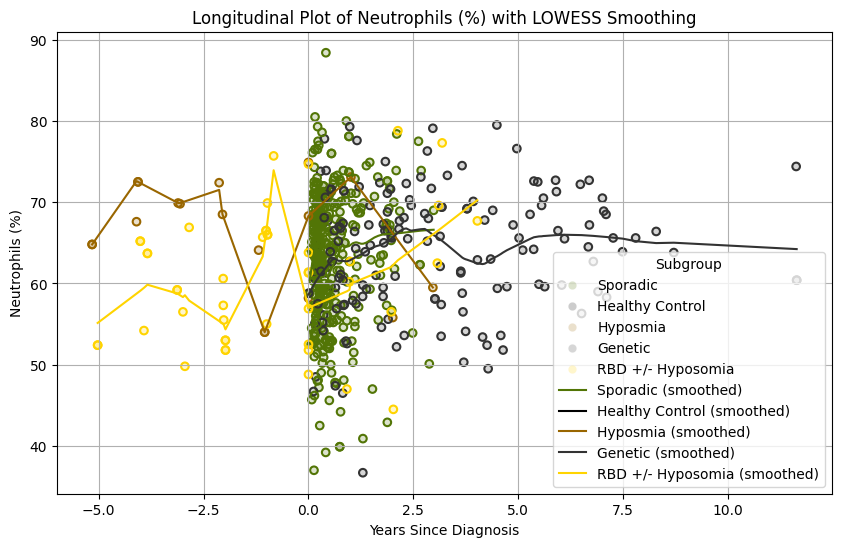

/Users/beckyparkinson/opt/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/beckyparkinson/opt/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckyparkinson/opt/miniconda3/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


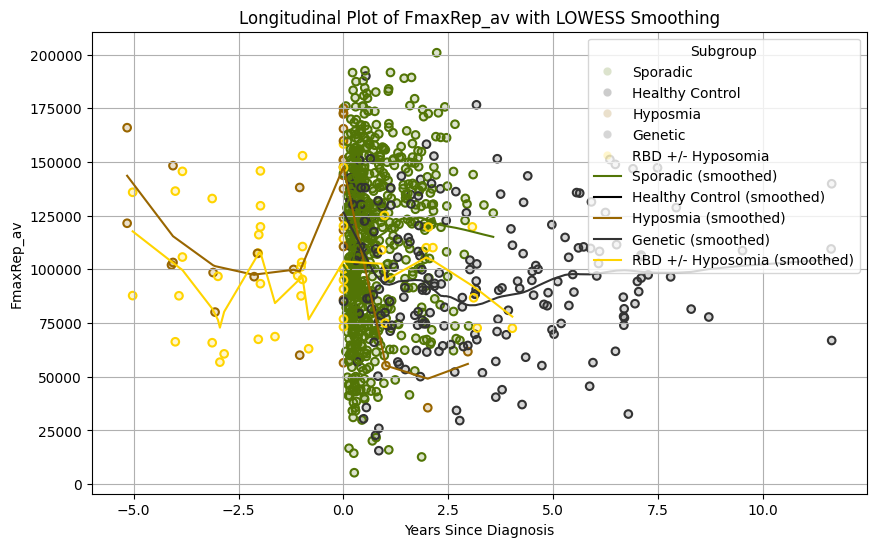

/Users/beckyparkinson/opt/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/beckyparkinson/opt/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/beckyparkinson/opt/miniconda3/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


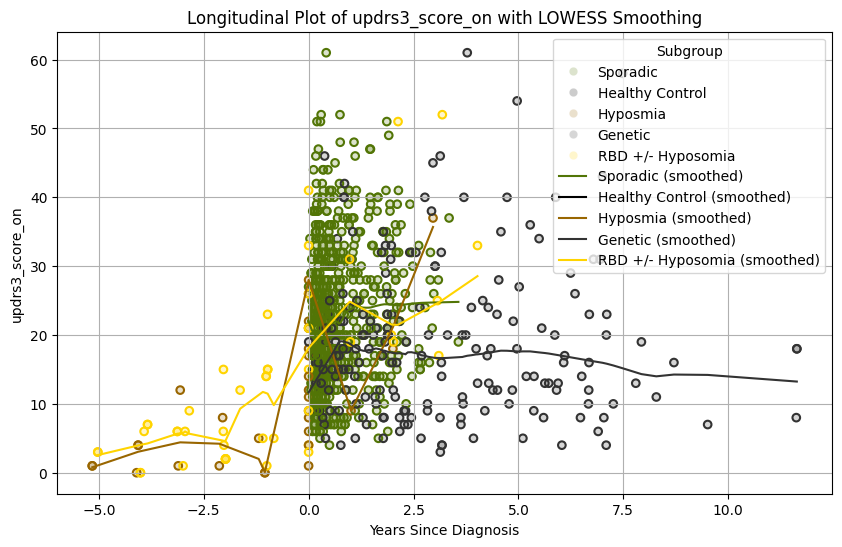

/Users/beckyparkinson/opt/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/beckyparkinson/opt/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


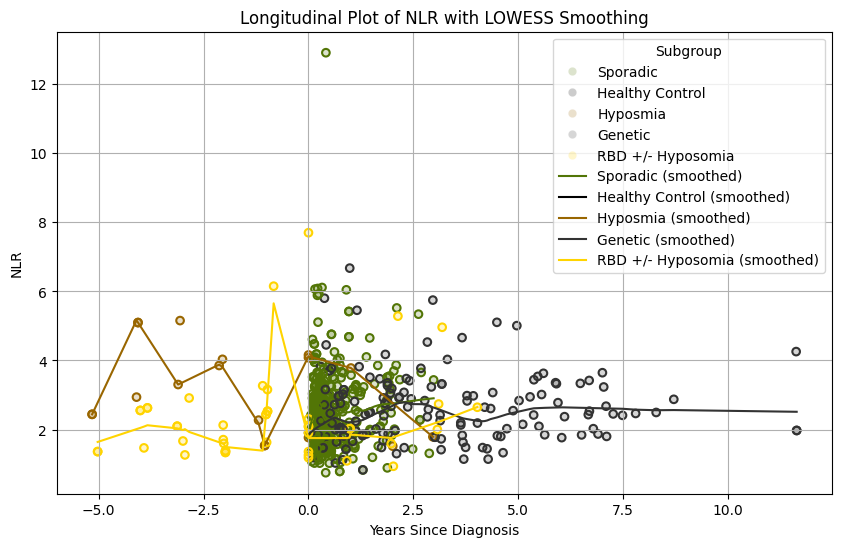

subgroup_simplified
Genetic              191
Hyposmia              15
RBD +/- Hyposomia     10
Sporadic             672
Name: PATNO, dtype: int64


In [4]:
########Quantify Time Since Diagnosis 
FinalConcat_PosSAA['age_at_visit'] = pd.to_numeric(FinalConcat_PosSAA['age_at_visit'], errors='coerce').astype(float)
FinalConcat_PosSAA['agediag'] = pd.to_numeric(FinalConcat_PosSAA['agediag'], errors='coerce').astype(float)
FinalConcat_PosSAA['ageonset'] = pd.to_numeric(FinalConcat_PosSAA['ageonset'], errors='coerce').astype(float)

FinalConcat_PosSAA['years_since_diagnosis1'] = FinalConcat_PosSAA['age_at_visit'] - FinalConcat_PosSAA['agediag']
# FinalConcat_PosSAA['years_since_onset'] = FinalConcat_PosSAA['age_at_visit'] - FinalConcat_PosSAA['ageonset']


#For sporadic patients
FinalConcat_PosSAA['years_since_diagnosis1'] = FinalConcat_PosSAA.apply(
    lambda row: row['age_at_visit'] - row['agediag'] if row['subgroup_simplified'] == 'Sporadic' or 'Genetic' else None,
    axis=1
)
# For prodromal patients, calculate the diagnosis point based on first 'PRIMDIAG' of 01
def calculate_years_since_diagnosis(row, primdiag_dates):
    if row['subgroup_simplified'] in ['Hyposmia', 'RBD +/- Hyposomia']:
        diagnosis_age = primdiag_dates.get(row['PATNO'], None)
        if diagnosis_age:
            return row['age_at_visit'] - diagnosis_age
    return None
# Find the first occurrence of 'PRIMDIAG' == 01 for each patient
prodromal_patients = FinalConcat_PosSAA[FinalConcat_PosSAA['PRIMDIAG'] == 1]
primdiag_dates = prodromal_patients.groupby('PATNO')['age_at_visit'].min().to_dict()
# Apply the function to calculate years since diagnosis for prodromal patients
FinalConcat_PosSAA['years_since_diagnosis1'] = FinalConcat_PosSAA.apply(
    lambda row: calculate_years_since_diagnosis(row, primdiag_dates) if pd.isna(row['years_since_diagnosis1']) else row['years_since_diagnosis1'],
    axis=1
)
FinalConcat_PosSAA['years_since_diagnosis1'] = pd.to_numeric(FinalConcat_PosSAA['years_since_diagnosis1'], errors='coerce')
print("FinalConcat_Rows: ",len(FinalConcat_PosSAA),"FinalConcat_Columns: ",len(FinalConcat_PosSAA.columns))

FinalConcat_PosSAA.to_csv("/Volumes/PARK2023-Q5758/SAA Systematic Review (Human Data)/Code_Output/FinalConcat_withDIAG.csv")

# plot
selected_columns = ['mean_caudate',
                    'mean_putamen',
                    'Lymphocytes (%)',
                    'Monocytes',
                    'Monocytes (%)',
                    'Neutrophils (%)',
                    'FmaxRep_av',
                    # 'asyn',
                    # 'CSFSAA',
                    'updrs3_score_on',
                    'NLR'
                    ]
for column in selected_columns:
    FinalConcat_PosSAA[column] = pd.to_numeric(FinalConcat_PosSAA[column], errors='coerce')
def plot_longitudinal_data_with_smoothing(df, columns):
    for column in columns:
        plt.figure(figsize=(10, 6))
        # Plot the original data
        sns.scatterplot(data=df, x='years_since_diagnosis1', y=column, hue='subgroup_simplified', marker='o', alpha=0.2, palette=color_dict)

        # Apply LOWESS smoothing for each subgroup
        for subgroup in df['subgroup_simplified'].unique():
            subset = df[df['subgroup_simplified'] == subgroup]
            if not subset.empty:
                x = subset['years_since_diagnosis1']
                y = subset[column]
                # Apply LOWESS
                smoothed = sm.nonparametric.lowess(y, x, frac=0.3)  # Adjust frac as needed 
                # Extract the smoothed values
                x_smoothed = smoothed[:, 0]
                y_smoothed = smoothed[:, 1]
                # Plot the smoothed values
                plt.plot(x_smoothed, y_smoothed, label=f'{subgroup} (smoothed)', color=color_dict.get(subgroup, 'black'))
        for index, row in df.iterrows():
                if pd.notna(row['subgroup_simplified']) and (row['QUALRep1'] == 'Positive' or row['QUALRep2'] == 'Positive' or row['QUALRep3'] == 'Positive'):
                    plt.scatter(row['years_since_diagnosis1'], row[column], facecolors='none', 
                                edgecolors=color_dict[row['subgroup_simplified']],linewidths=1.5, s=30)


        plt.title(f'Longitudinal Plot of {column} with LOWESS Smoothing')
        plt.xlabel('Years Since Diagnosis')
        plt.ylabel(column)
        plt.legend(title='Subgroup')
        plt.grid(True)
        filename = f'{column}.svg'
        plt.savefig(filename, format='svg')
        plt.show()

# Plot the data with smoothing
plot_longitudinal_data_with_smoothing(FinalConcat_PosSAA, selected_columns)

#Confirm number of participants in dataset
filtered_df = FinalConcat_PosSAA[FinalConcat_PosSAA['years_since_diagnosis1'].notna()]
unique_patno_counts = filtered_df.groupby('subgroup_simplified')['PATNO'].nunique()
print(unique_patno_counts)


## By age

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess
frac = 0.1
for column in selected_columns:
    try:
        plt.figure(figsize=(8, 6))
        if FinalConcat_PosSAA[column].dtype == 'float64':
            FinalConcat_PosSAA[column] = FinalConcat_PosSAA[column].astype(float)
        
        # Plotting for each subgroup with LOESS smoothing
        subgroups = FinalConcat_PosSAA['subgroup_simplified'].unique()
        for subgroup in subgroups:
            subset = FinalConcat_PosSAA[FinalConcat_PosSAA['subgroup_simplified'] == subgroup]
            smoothed = lowess(subset[column], subset['years_since_diagnosis'], frac=frac)
            plt.plot(smoothed[:, 0], smoothed[:, 1], label=subgroup, color=color_dict.get(subgroup, 'gray'))
        
        plt.title(f'Longitudinal Plot of {column} by Subgroup')
        plt.xlabel('years since diagnosis')
        plt.ylabel(column)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.legend(title='subgroup')
        filename = f'{column}.svg'
        plt.savefig(filename, format='svg')
        plt.show()
        plt.clf()
    except Exception as e:
        print(f"Error plotting {column}: {str(e)}")


# Verify the number of rows in each subgroup
print("Number of rows in each subgroup:")
print(FinalConcat_PosSAA['subgroup'].value_counts())


Error plotting mean_caudate: 'years_since_diagnosis'
Error plotting mean_putamen: 'years_since_diagnosis'
Error plotting Lymphocytes (%): 'years_since_diagnosis'
Error plotting Monocytes: 'years_since_diagnosis'
Error plotting Monocytes (%): 'years_since_diagnosis'
Error plotting Neutrophils (%): 'years_since_diagnosis'
Error plotting FmaxRep_av: 'years_since_diagnosis'
Error plotting asyn: 'years_since_diagnosis'
Error plotting CSFSAA: 'years_since_diagnosis'
Error plotting updrs_totscore_I-IV: 'years_since_diagnosis'
Error plotting NLR: 'years_since_diagnosis'
Number of rows in each subgroup:
subgroup
Sporadic                  3812
LRRK2                     1999
Healthy Control           1613
GBA                       1378
Hyposmia                   482
RBD + Hyposmia             277
RBD                        221
LRRK2 + GBA                139
LRRK2 + Hyposmia           122
SNCA                       120
GBA + Hyposmia              98
SNCA + Hyposmia             32
PRKN             

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [ ]:
# ##Stats for PRIMDIAG and years since diagnosis 
# FinalConcat_PosSAA['subgroup'] = FinalConcat_PosSAA['subgroup'].astype('category')
# model = MixedLM("NLR ~ QUALRep1 * years_since_diagnosis1 * subgroup", FinalConcat_PosSAA, groups=FinalConcat_PosSAA["PATNO"], re_formula="~years_since_diagnosis1")
# result = model.fit()
# print(result.summary())